<a href="https://colab.research.google.com/github/imcinstitute/ML-labs/blob/main/Lab_V_Regression_Model_(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install seaborn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
 # %tensorflow_version only exists in Colab.
 %tensorflow_version 2.x
except Exception:
 pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [ ]:
dataset_path = keras.utils.get_file("housing.data","http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
dataset_path

49152/49082 [==============================] - 0s 5us/step


'/root/.keras/datasets/housing.data'

In [ ]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values = "?", comment='\t',
                          sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,11.097951,6.699157,0.7400,5.3200,9.6900,18.1000,27.7400
ZN,405.0,0.069136,0.253999,0.0000,0.0000,0.0000,0.0000,1.0000
INDUS,405.0,0.553098,0.115564,0.3850,0.4490,0.5380,0.6240,0.8710
CHAS,405.0,6.269768,0.690552,3.5610,5.8780,6.1930,6.6190,8.7800
NOX,405.0,68.241975,27.908527,2.9000,45.0000,76.5000,94.1000,100.0000
RM,405.0,3.834098,2.162173,1.1296,2.0788,3.2721,5.2146,12.1265
DIS,405.0,9.474074,8.618564,1.0000,4.0000,5.0000,24.0000,24.0000
RAD,405.0,405.839506,164.057951,187.0000,284.0000,334.0000,666.0000,711.0000
TAX,405.0,18.437037,2.141275,12.6000,17.3000,18.8000,20.2000,22.0000
PTRATIO,405.0,356.276444,91.298597,2.6000,375.2100,391.2300,396.2400,396.9000


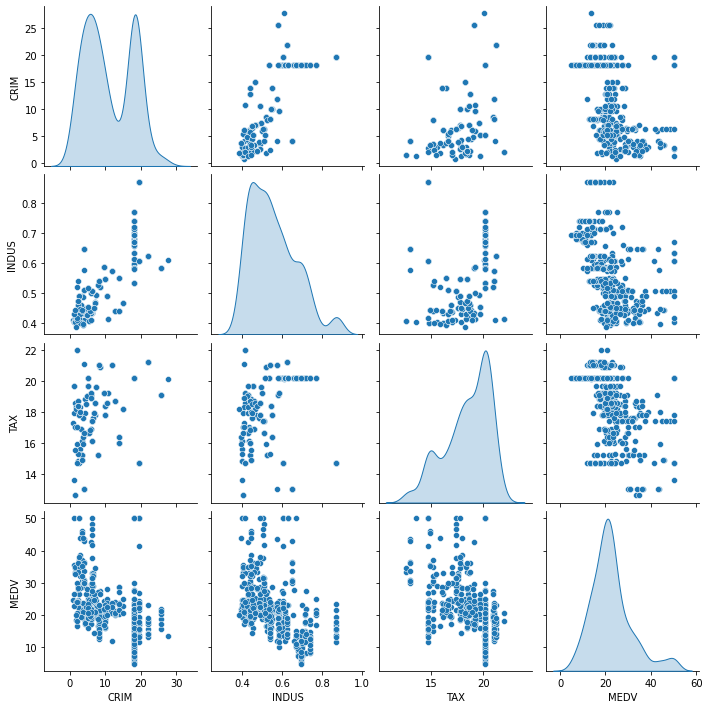

In [ ]:
dataset.isna().sum()
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["CRIM", "INDUS", "TAX", "MEDV"]],
             diag_kind="kde")
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

In [ ]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')
def norm(x):
 return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.tail()
normed_test_data.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B
0.15086,0.0,2.484201,-0.27219,0.483734,-1.181328,0.876364,-0.931099,-0.635149,1.860077,0.776623,0.425128,0.764580
0.18337,0.0,2.484201,-0.27219,0.483734,-1.239252,1.077019,-0.961393,-0.635149,1.860077,0.776623,-0.133917,1.598115
0.20746,0.0,2.484201,-0.27219,0.483734,-1.704098,1.066270,-0.930313,-0.635149,1.860077,0.776623,-0.414535,2.403443
0.11132,0.0,2.484201,-0.27219,0.483734,-0.415274,0.546716,-0.797438,-0.635149,1.860077,0.776623,0.444953,0.100290
0.10959,0.0,0.124202,-0.27219,0.172218,0.759150,0.754537,-0.668401,-0.983235,-0.809711,1.196933,0.407165,-0.868642


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu',
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
   ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.6397499 ],
       [0.09435227],
       [0.50609803],
       [0.35515267],
       [0.30931604],
       [0.42426777],
       [0.39637756],
       [0.3220183 ],
       [0.47137377],
       [0.6838674 ]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
  if epoch % 100 == 0: print('')
  print('.', end='')

In [ ]:
EPOCHS = 10000
history = model.fit(
 normed_train_data, train_labels,
 epochs=EPOCHS, validation_split = 0.2, verbose=0,
 callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................